In [1]:
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
from numpy import *
from scipy.integrate import odeint
%matplotlib inline
from scipy.interpolate import interp1d

T = 764.898167259
Fst = 0.894158564593
S = 19.3076281241


array([ 773.6459462 ,  771.01221777])

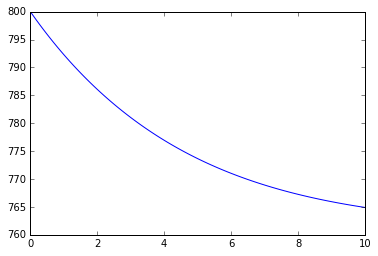

In [7]:
"""a)-c)"""
V = 10 #m3
Febo = 0.00344 #kmol/s
Fso = 14.5 * Febo
Ftot0 = Febo + Fso
Ptoto = 2.4 #atm
R = 8.314
To = 800
# Qo =  (Fs + Feb)*R*To/(Ptoto*101.325)
Cpm, Cpe, Cpb, Cpt, Cpst, Cpeb, Cph, Cps = 68,90,201,249,273,299,30,40
Hrxn1o,Hrxn2o,Hrxn3o =118000,105200,-53900
dCp1 = -Cpeb + Cpst + Cph
dCp2 = -Cpeb + Cpb + Cpe
dCp3 = -Cpeb - Cph + Cpt + Cpm

def Hrxn(T):
    Hrxn1 = Hrxn1o + dCp1*(T - 300)
    Hrxn2 = Hrxn2o + dCp2*(T - 300)
    Hrxn3 = Hrxn3o + dCp3*(T - 300)
    return [Hrxn1,Hrxn2,Hrxn3]    
    
b1 = -17.34 
b4 = -2.314E-10
b5 = 1.302E-6
b2 = - 1.302E4
b3 = 5.051
b6 = -4.931E-3 
rho_c = 2137 #kg/m3 of pellet
porosity = 0.4
rho_b = rho_c*(1-porosity)

def ddt(Initial,dt):
    Feb, Fs, Fm, Fe, Fb, Ft, Fst, Fh ,T= Initial
    
    Ftot = Fm + Fe + Fb + Ft + Fst + Feb + Fh + Fs
    
    Peb = Feb/Ftot*Ptoto
    Pst = Fst/Ftot*Ptoto
    Ph = Fh/Ftot*Ptoto
    
    Kp1 = exp(b1 + b2/T + b3*log(T) + ((b4*T+ b5)*T+ b6)*T)
              
    r1st = rho_b*exp(-0.08539 - 10925/T)*(Peb - Pst*Ph/Kp1)
    r2B = rho_b*exp(13.2392 - 25000/T)*(Peb)
    r3T = rho_b*exp(0.2961 - 11000/T)*(Peb*Ph)
        
    dNmdV = r3T
    dNedV = r2B
    dNbdV = r2B
    dNtdV = r3T
    dNstdV = r1st
    dNebdV = -r1st - r2B - r3T
    dNhdV = r1st - r3T
    dNsdV = 0 
    
    Hrxn1,Hrxn2,Hrxn3 = Hrxn(T)
    dTdV = (-r1st*Hrxn1 - r2B*Hrxn2 - r3T*Hrxn3)/(Fm*Cpm + Fe*Cpe + Fb*Cpb + Ft*Cpt + Fst*Cpst + Feb*Cpeb + Fh*Cph + Fs*Cps)
    return dNebdV,dNsdV,dNmdV,dNedV,dNbdV,dNtdV,dNstdV,dNhdV,dTdV
To = 800
Vspan = linspace(0,V,101)
ANS = odeint(ddt,[Febo,Fso,0,0,0,0,0,0,To],Vspan)
Temp = ANS[:,8]
Fst = ANS[:,6]
Fb = ANS[:,4]
Ft = ANS[:,5]
plt.plot(Vspan,Temp)
print ('T = ' + str(Temp[-1]))
print ('Fst = ' + str(Fst[-1]*1000))
print ('S = ' + str(Fst[-1]/(Ft[-1] + Fb[-1])))
f = interp1d(Vspan,Temp)
f([5,6])

Optimium Temp = 994.194194194


2.2530026169046442

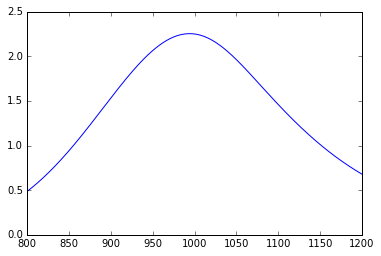

In [3]:
"""d)"""

Febo = 0.00344 #kmol/s
Fso = 58 * Febo
Vspan = linspace(0,V,101)
Tspan = linspace(800,1200,1000)
FST = []
for To in Tspan:
    ANS = odeint(ddt,[Febo,Fso,0,0,0,0,0,0,To],Vspan)
    Fst = ANS[:,6]
    FST.append(Fst[-1]*1000)
FST = array(FST)
plt.plot(Tspan,FST)
print ("Optimium Temp = " + str(Tspan[argmax(FST)]))
max(FST)

Optimium Ratio = 24.9494949495


1.8881395105531633

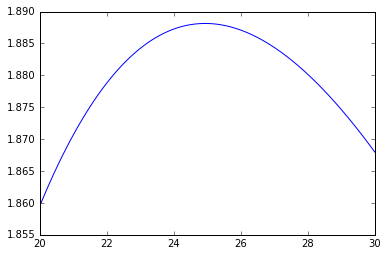

In [4]:
"""e)"""
V = 10 #m3
Febo = 0.00344 #kmol/s
Vspan = linspace(0,V,101)
Rspan = linspace(20,30,100)
FST = []
To = 900
for R in Rspan:
    Fso = R * Febo
    ANS = odeint(ddt,[Febo,Fso,0,0,0,0,0,0,To],Vspan)
    Fst = ANS[:,6]
    FST.append(Fst[-1]*1000)
FST = array(FST)
plt.plot(Rspan,FST)
print ("Optimium Ratio = " + str(Rspan[argmax(FST)]))
max(FST)

Optimium Temp = 744.544544545


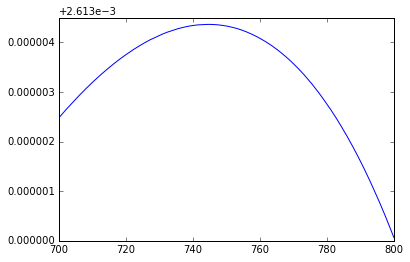

In [5]:
"""f)"""

def ddtnon(Initial,dt):
    Feb, Fs, Fm, Fe, Fb, Ft, Fst, Fh ,T= Initial
    
    Ftot = Fm + Fe + Fb + Ft + Fst + Feb + Fh + Fs
    
    Peb = Feb/Ftot*Ptoto
    Pst = Fst/Ftot*Ptoto
    Ph = Fh/Ftot*Ptoto
    
    Kp1 = exp(b1 + b2/T + b3*log(T) + ((b4*T+ b5)*T+ b6)*T)
              
    r1st = rho_b*exp(-0.08539 - 10925/T)*(Peb - Pst*Ph/Kp1)
    r2B = rho_b*exp(13.2392 - 25000/T)*(Peb)
    r3T = rho_b*exp(0.2961 - 11000/T)*(Peb*Ph)
              
    dNmdV = r3T
    dNedV = r2B
    dNbdV = r2B
    dNtdV = r3T
    dNstdV = r1st
    dNebdV = -r1st - r2B - r3T
    dNhdV = r1st - r3T
    dNsdV = 0 
    
    Hrxn1,Hrxn2,Hrxn3 = Hrxn(T)
    dTdV = (-r1st*Hrxn1 - r2B*Hrxn2 - r3T*Hrxn3 + Ua*(Tu - T))/(Fm*Cpm + Fe*Cpe + Fb*Cpb + Ft*Cpt + Fst*Cpst + Feb*Cpeb + Fh*Cph + Fs*Cps)
    return dNebdV,dNsdV,dNmdV,dNedV,dNbdV,dNtdV,dNstdV,dNhdV,dTdV

Ua = 5/3
Tu = 1000
Febo = 0.00344 #kmol/s
Fso = 20 * Febo
Tspan = linspace(700,800,1000)
FST = []
for To in Tspan:
    ANS = odeint(ddtnon,[Febo,Fso,0,0,0,0,0,0,To],Vspan)
    Fst = ANS[:,6]
    Fb = ANS[:,4]
    Ft = ANS[:,5]
    FST.append(Fst[-1])
FST = array(FST)
plt.plot(Tspan,FST)
print ("Optimium Temp = " + str(Tspan[argmax(FST)]))

T = 989.016780606
Fst = 2.61306565263
S = 3.67369804182


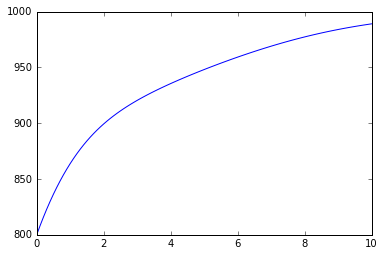

In [6]:
To = 800
Vspan = linspace(0,V,101)
ANS = odeint(ddtnon,[Febo,Fso,0,0,0,0,0,0,To],Vspan)
Temp = ANS[:,8]
Fst = ANS[:,6]
Fb = ANS[:,4]
Ft = ANS[:,5]
plt.plot(Vspan,Temp)
print ('T = ' + str(Temp[-1]))
print ('Fst = ' + str(Fst[-1]*1000))
print ('S = ' + str(Fst[-1]/(Ft[-1] + Fb[-1])))